In [1]:
pip install tensorflow pandas numpy scikit-learn matplotlib

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import re
import matplotlib.pyplot as plt

In [3]:
# Create a simple dataset
data = {
    'text': [
        'cricket match won by india today',
        'new smartphone launched with camera',
        'doctor discovers cure for disease',
        'stock market rises to new high',
        'football team wins championship',
        'AI technology improves computer speed',
        'hospital reports health breakthrough',
        'company profits increase this quarter',
        'basketball player scores record points',
        'laptop battery life improved significantly',
        'medicine helps patients recover faster',
        'business economy shows growth signs',
        'tennis player wins grand slam',
        'software update fixes major bugs',
        'vaccine development shows promise',
        'market trends predict economic boom'
    ] * 50,  # Repeat to create more samples
    'category': [
        'Sports', 'Technology', 'Health', 'Business',
        'Sports', 'Technology', 'Health', 'Business',
        'Sports', 'Technology', 'Health', 'Business',
        'Sports', 'Technology', 'Health', 'Business'
    ] * 50
}

df = pd.DataFrame(data)
print(f"Dataset size: {len(df)}")
print(f"\nCategory distribution:\n{df['category'].value_counts()}")

Dataset size: 800

Category distribution:
category
Sports        200
Technology    200
Health        200
Business      200
Name: count, dtype: int64


In [4]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Apply cleaning
df['cleaned_text'] = df['text'].apply(clean_text)
print("\nSample cleaned text:")
print(df['cleaned_text'].head())


Sample cleaned text:
0       cricket match won by india today
1    new smartphone launched with camera
2      doctor discovers cure for disease
3         stock market rises to new high
4        football team wins championship
Name: cleaned_text, dtype: object


In [5]:
# Encode labels
category_map = {'Sports': 0, 'Technology': 1, 'Health': 2, 'Business': 3}
df['label'] = df['category'].map(category_map)

# Split data
X = df['cleaned_text'].values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 640
Testing samples: 160


In [6]:
# Tokenize
max_words = 1000
max_len = 20

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Convert to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

print(f"\nSequence shape: {X_train_pad.shape}")
print(f"Sample sequence: {X_train_pad[0]}")


Sequence shape: (640, 20)
Sample sequence: [39  3 40 41 42  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [7]:
# Build model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    SimpleRNN(32),
    Dense(4, activation='softmax')
])

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Show model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train
history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_pad, y_test),
    verbose=1
)

# Save model
model.save('text_classifier_rnn.h5')
print("\nModel saved!")

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6339 - loss: 1.1187 - val_accuracy: 1.0000 - val_loss: 0.3041
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.2275 - val_accuracy: 1.0000 - val_loss: 0.0984
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0801 - val_accuracy: 1.0000 - val_loss: 0.0473
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0410 - val_accuracy: 1.0000 - val_loss: 0.0296
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0269 - val_accuracy: 1.0000 - val_loss: 0.0210
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0194 - val_accuracy: 1.0000 - val_loss: 0.0159
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0148 - val_accuracy: 1.0000 - val_loss: 0.0126
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0118 - val_accuracy: 1.0000 - v


Model saved!


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0072 

Test Accuracy: 100.00%


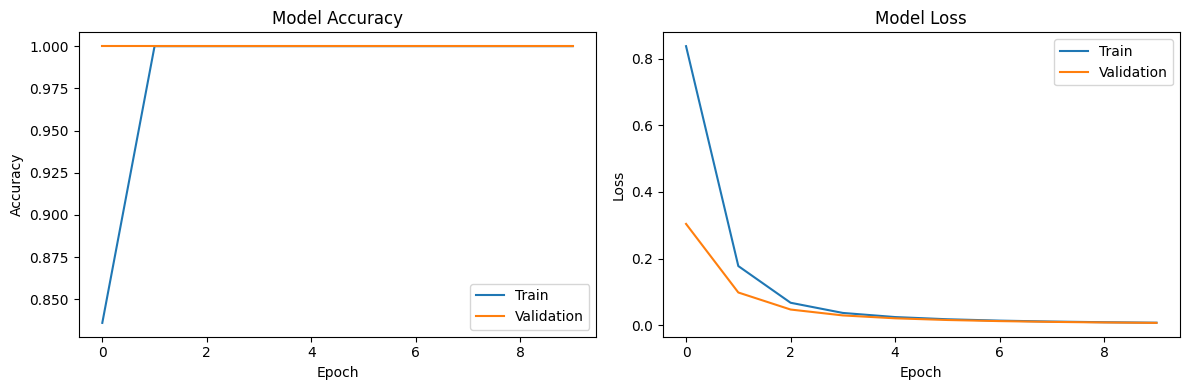

In [9]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test_pad, y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('training_results.png')
plt.show()

In [10]:
# Prediction function
def predict_category(text):
    # Clean text
    cleaned = clean_text(text)

    # Convert to sequence
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=max_len, padding='post')

    # Predict
    pred = model.predict(padded, verbose=0)
    category_idx = np.argmax(pred)
    confidence = pred[0][category_idx] * 100

    # Map to category name
    categories = {0: 'Sports', 1: 'Technology', 2: 'Health', 3: 'Business'}
    category = categories[category_idx]

    return category, confidence

# Test predictions
test_texts = [
    "The cricket team won the match yesterday",
    "New smartphone launched with AI features",
    "Doctors found cure for disease",
    "Stock market reached new heights"
]

print("\n" + "="*60)
print("PREDICTIONS")
print("="*60)
for text in test_texts:
    category, confidence = predict_category(text)
    print(f"\nText: {text}")
    print(f"Category: {category}")
    print(f"Confidence: {confidence:.2f}%")
    print("-"*60)


PREDICTIONS

Text: The cricket team won the match yesterday
Category: Sports
Confidence: 97.94%
------------------------------------------------------------

Text: New smartphone launched with AI features
Category: Technology
Confidence: 99.00%
------------------------------------------------------------

Text: Doctors found cure for disease
Category: Health
Confidence: 94.05%
------------------------------------------------------------

Text: Stock market reached new heights
Category: Business
Confidence: 96.60%
------------------------------------------------------------


In [11]:
import pickle

with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
print("\nTokenizer saved!")


Tokenizer saved!
